# Загрузка датасета

необходимые библиотеки

In [335]:
import pandas as pd

загрузка датасета

In [336]:
data =  pd.read_csv('brain_stroke.csv')

# Быстрый осмотр датасета

размерность данных

In [337]:
data.shape

(4981, 11)

признаки

In [338]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

краткая информация по признакам

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## Посмотр уникальных значений столбцов с их количеством

In [340]:
data['gender'].value_counts()

,count
gender,
Female,2907
Male,2074


In [341]:
data['age'].value_counts()

,count
age,
78.00,102
57.00,92
54.00,85
51.00,84
79.00,84
...,...
1.16,3
0.48,3
0.40,2


In [342]:
data['hypertension'].value_counts()

,count
hypertension,
0,4502
1,479


In [343]:
data['heart_disease'].value_counts()

,count
heart_disease,
0,4706
1,275


In [344]:
data['ever_married'].value_counts()

,count
ever_married,
Yes,3280
No,1701


In [345]:
data['work_type'].value_counts()

,count
work_type,
Private,2860
Self-employed,804
children,673
Govt_job,644


In [346]:
data['Residence_type'].value_counts()

,count
Residence_type,
Urban,2532
Rural,2449


In [347]:
data['avg_glucose_level'].value_counts()

,count
avg_glucose_level,
93.88,6
73.00,5
83.16,5
91.85,5
72.49,5
...,...
130.56,1
67.78,1
116.12,1


In [348]:
data['bmi'].value_counts()

,count
bmi,
28.7,42
28.4,41
27.3,38
27.7,37
26.7,37
...,...
48.4,1
48.2,1
46.6,1


In [349]:
data['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1838
Unknown,1500
formerly smoked,867
smokes,776


In [350]:
data['stroke'].value_counts()

,count
stroke,
0,4733
1,248


## Выводы после просмотра

В данных очень много несбалансированных признаков, с которыми в их первоначальном виде работать нельзя, поэтому перед балансировкой по ключевому признаку стоит произвести редактирование остальных столбцов.

Дальше будет описано, что нужно сделать для каждого столбца

1) gender: с данным столбцом всё в порядке, ничего не делаем;

2) age: в данном столбце слишком много уникальных значений, поэтому данные будут преобразованы в интервалы, например, если возраст > 90, то пишем 90, и так далее;

3) hypertension: по данному столбцу пока что ничего не известно, возможно стоит его сбалансировать вместе с целевым признаком, однако для этого стоит посмотреть корреляцию между этим столбцом и ключевым признаком;

4) heart_disease: по данному столбцу пока что ничего не известно, возможно стоит его сбалансировать вместе с целевым признаком, однако для этого стоит посмотреть корреляцию между этим столбцом и ключевым признаком;

5) ever_married: с данным столбцом всё в порядке, ничего не делаем;

6) work_type: с данным столбцом всё в порядке, ничего не делаем;

7) Residence_type: с данным столбцом всё в порядке, ничего не делаем;

8) avg_glucose_level: данный столбец содержит слишком много уникальных значений, поэтому стоит преобразовать его интервальным способом;

9) bmi: данный столбец содержит слишком много уникальных значений, поэтому стоит преобразовать его интервальным способом;

10) smoking_status: с данным столбцом, вроде, всё в порядке, правда, стоит подумать, что делать с значением Unknown, так как оно составляет существенную часть, возможно, данный столбец стоит удалить.

# Обработка столбцов

необходимые библиотеки

In [351]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Обработка столбца age

посмотрим на распределение значений признака

In [352]:
data['age'].describe()

,age
count,4981.000000
mean,43.419859
std,22.662755
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


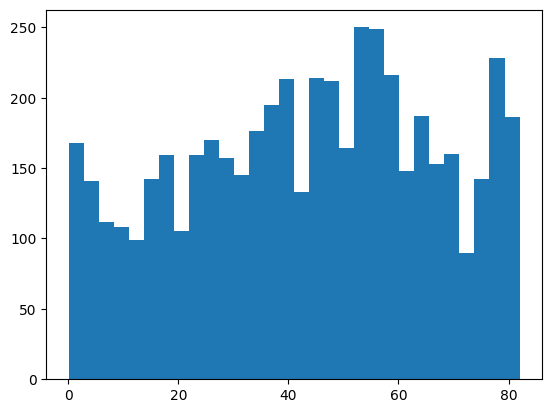

In [353]:
plt.hist(data['age'], bins=30)
plt.show()

значения +- лежат равномерно, так что просто определим группы, по десятелетиям, имя группы будем присваивать в качестве нового значения

функция обработки столбца age

In [354]:
def transform_age(age: int) -> int:
  return int(age // 10 * 10)

In [355]:
data['age'] = data['age'].apply(transform_age)

## Обработка столбца hypertension

посмотрим корреляцию с целевым признаком

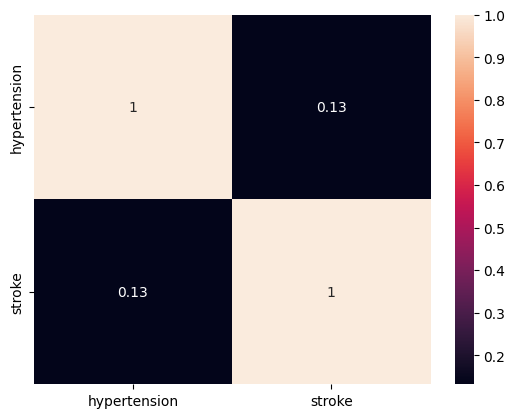

In [356]:
sns.heatmap(data[['hypertension', 'stroke']].corr(), annot=True)
plt.show()

In [357]:
data.loc[data['stroke'] == 0, ['hypertension']].value_counts()

,count
hypertension,
0,4320
1,413


In [358]:
data.loc[data['stroke'] == 1, ['hypertension']].value_counts()

,count
hypertension,
0,182
1,66


Некоторая корреляция есть, но она очень слабая, вероятно, столбце прийдётся удалить

## Обработка столбца heart_disease

посмотрим на корреляцию с целефым признаком

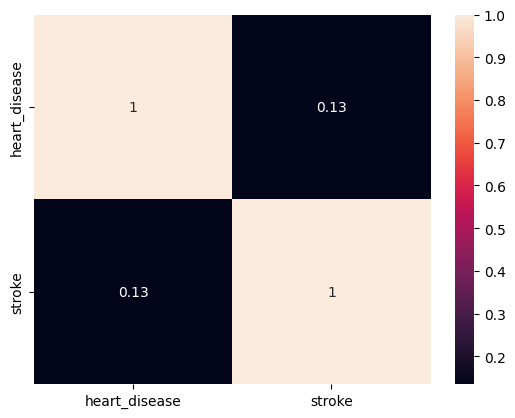

In [359]:
sns.heatmap(data[['heart_disease', 'stroke']].corr(), annot=True)
plt.show()

In [360]:
data.loc[data['stroke'] == 0, ['heart_disease']].value_counts()

,count
heart_disease,
0,4505
1,228


In [361]:
data.loc[data['stroke'] == 1, ['heart_disease']].value_counts()

,count
heart_disease,
0,201
1,47


Всё аналогично предыдущему столбцу: вроде, какая-то корреляция есть, но её может быть недостаточно

## Обработка столбца avg_glucose_level

посмотрим на распределение значений признака

In [362]:
data['avg_glucose_level'].describe()

,avg_glucose_level
count,4981.000000
mean,105.943562
std,45.075373
min,55.120000
25%,77.230000
50%,91.850000
75%,113.860000
max,271.740000


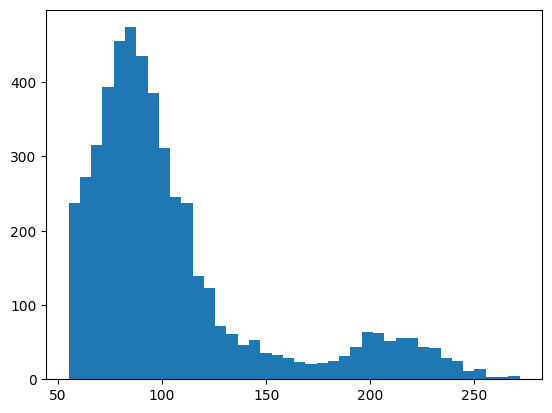

In [363]:
plt.hist(data['avg_glucose_level'], bins=40)
plt.show()

Видно, что основная масса значений лежит в диапазоне от 55 до, примерно, 113. В таком случае уместно будет поделить описанный выше интервал на десятки, а оставшийся на пятидесятки.

функция обработки столбца avg_glucose_level

In [364]:
def transform_glucose_level(avg_glucose_level: float) -> int:
  if avg_glucose_level < 113:
    return int(avg_glucose_level // 10 * 10)
  else:
    return int(avg_glucose_level // 50 * 50)

In [365]:
data['avg_glucose_level'] = data['avg_glucose_level'].apply(transform_glucose_level)

## Обработка столбца bmi

посмотрим на распределение значений признака

In [366]:
data['bmi'].describe()

,bmi
count,4981.000000
mean,28.498173
std,6.790464
min,14.000000
25%,23.700000
50%,28.100000
75%,32.600000
max,48.900000


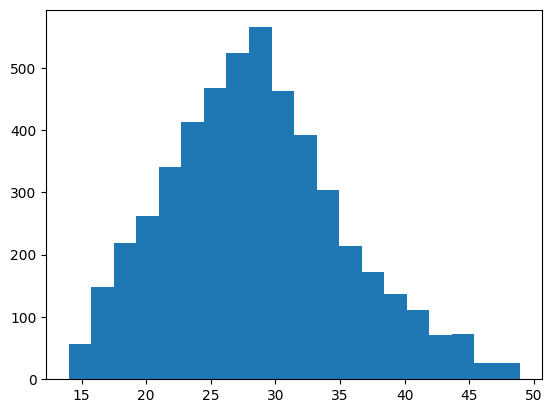

In [367]:
plt.hist(data['bmi'], bins=20)
plt.show()

поделим просто на интервалы по 5

функция обработки столбца bmi

In [368]:
def transform_bmi(bmi: float) -> int:
  return int(bmi // 5 * 5)

In [369]:
data['bmi'] = data['bmi'].apply(transform_bmi)

## Обработка столбца smoking_status

проведём декодирование столбца

In [370]:
lblEnc = LabelEncoder()
data['smoking_status'] = lblEnc.fit_transform(data['smoking_status'])

посмотрим на корреляцию с основным признаком

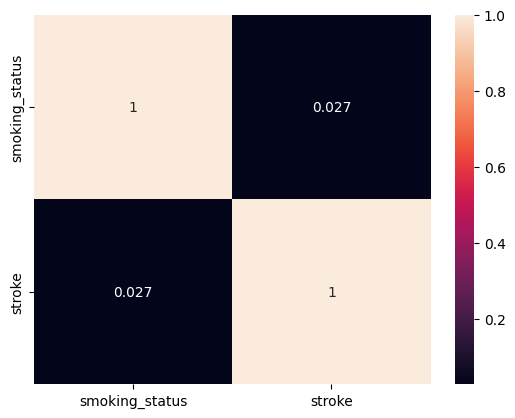

In [371]:
sns.heatmap(data[['smoking_status', 'stroke']].corr(), annot=True)
plt.show()

In [372]:
data.loc[data['stroke'] == 0, ['smoking_status']].value_counts()

,count
smoking_status,
2,1749
0,1453
1,797
3,734


In [373]:
data.loc[data['stroke'] == 1, ['smoking_status']].value_counts()

,count
smoking_status,
2,89
1,70
0,47
3,42


Тут корреляции нет вообще + дофига пропущенных данных, так что стоит этот столбец удалить

## Обработка категориальных столбцов

In [374]:
lblEnc = LabelEncoder()

data['gender'] = lblEnc.fit_transform(data['gender'])
data['ever_married'] = lblEnc.fit_transform(data['ever_married'])
data['work_type'] = lblEnc.fit_transform(data['work_type'])
data['Residence_type'] = lblEnc.fit_transform(data['Residence_type'])

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             4981 non-null   int64
 1   age                4981 non-null   int64
 2   hypertension       4981 non-null   int64
 3   heart_disease      4981 non-null   int64
 4   ever_married       4981 non-null   int64
 5   work_type          4981 non-null   int64
 6   Residence_type     4981 non-null   int64
 7   avg_glucose_level  4981 non-null   int64
 8   bmi                4981 non-null   int64
 9   smoking_status     4981 non-null   int64
 10  stroke             4981 non-null   int64
dtypes: int64(11)
memory usage: 428.2 KB


# Принятие решений по столбцам

перед окончательным принятием решений выведем общую матрицу корреляции

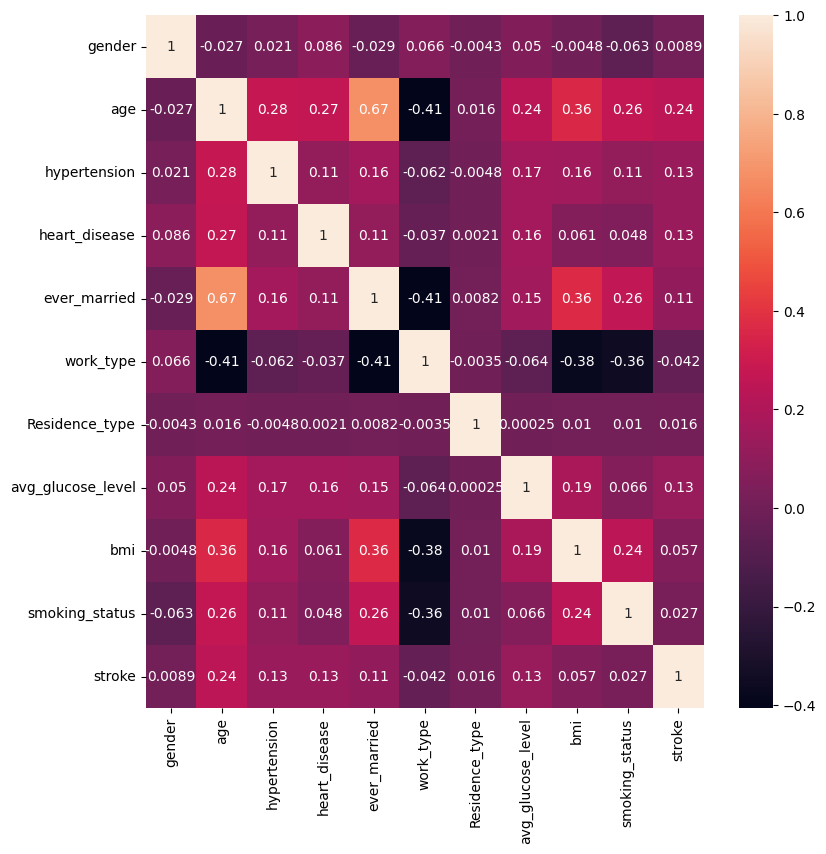

In [376]:
plt.figure(figsize=(9, 9))
sns.heatmap(data.corr(), annot=True)
plt.show()

Создадим копию данных с удалёнными столбцами, корреляция с целевым признаком которых меньше десятой доли единицы, а именно: gender, work_type, Residence_type, bmi, smoking_status

In [377]:
origin_data = data.copy()

transform_data = data.copy()

del transform_data['gender']
del transform_data['work_type']
del transform_data['Residence_type']
del transform_data['bmi']
del transform_data['smoking_status']

# отделение целевого признака

In [378]:
y = origin_data['stroke'].copy()

del origin_data['stroke']
del transform_data['stroke']

# Выясняем какой метод нормировки данных лучше всегоп подходит

необходимые библиотеки

In [379]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

разбиваем на train и test

без нормировки данных

In [380]:
od_train, od_test, y_train, y_test = train_test_split(origin_data, y, train_size=0.3, random_state=52)
td_train, td_test, y_train, y_test = train_test_split(transform_data, y, train_size=0.3, random_state=52)

dt_origin = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_origin.fit(od_train, y_train)

dt_transform = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_transform.fit(td_train, y_train)

dt_origin.score(od_test, y_test), dt_transform.score(td_test, y_test)

(0.9354746200172067, 0.941783768282191)

StandartScaler

In [381]:
std_scl = StandardScaler()

temp_origin_data = std_scl.fit_transform(origin_data)
temp_transform_data = std_scl.fit_transform(transform_data)

od_train, od_test, y_train, y_test = train_test_split(temp_origin_data, y, train_size=0.3, random_state=52)
td_train, td_test, y_train, y_test = train_test_split(temp_transform_data, y, train_size=0.3, random_state=52)

dt_origin = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_origin.fit(od_train, y_train)

dt_transform = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_transform.fit(td_train, y_train)

dt_origin.score(od_test, y_test), dt_transform.score(td_test, y_test)

(0.9354746200172067, 0.941783768282191)

MinMaxScaler

In [382]:
min_max_scl = MinMaxScaler()

temp_origin_data = min_max_scl.fit_transform(origin_data)
temp_transform_data = min_max_scl.fit_transform(transform_data)

od_train, od_test, y_train, y_test = train_test_split(temp_origin_data, y, train_size=0.3, random_state=52)
td_train, td_test, y_train, y_test = train_test_split(temp_transform_data, y, train_size=0.3, random_state=52)

dt_origin = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_origin.fit(od_train, y_train)

dt_transform = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_transform.fit(td_train, y_train)

dt_origin.score(od_test, y_test), dt_transform.score(td_test, y_test)

(0.9354746200172067, 0.9429308861485518)

Разницы особой нет, но MinMaxScaler показал себя чуть лучше остальных, впредь будем использовать его

In [383]:
origin_data = min_max_scl.fit_transform(origin_data)
transform_data = min_max_scl.fit_transform(transform_data)

# Далее будем применять разные методы балансировки и обучать на них 3 вида моделей: дерево решений, случайный лес, градиентный бустинг

необходимые библиотеки

In [384]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
import numpy as np
from sklearn.metrics import confusion_matrix

# Без применения методов балансировки

разбиваем выборку

In [385]:
od_train, od_test, y_train, y_test = train_test_split(origin_data, y, test_size=0.3, random_state=52)
td_train, td_test, y_train, y_test = train_test_split(transform_data, y, test_size=0.3, random_state=52)

## Выбираем лучшие параметры для моделей

дерево решений

In [386]:
GDCV = GridSearchCV( DecisionTreeClassifier(),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 3}

случайный лес

In [387]:
GDCV = GridSearchCV( RandomForestClassifier(),
                     param_grid=[ { 'max_depth': [3],
                                    'min_samples_split': [3],
                                    'min_samples_leaf': [8],
                                    'max_features': [40, 60, 70, 80, 100],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'max_depth': 3,
 'max_features': 40,
 'min_samples_leaf': 8,
 'min_samples_split': 3,
 'n_estimators': 1}

градиентный бустинг

In [388]:
GDCV = GridSearchCV( xgb.XGBClassifier(),
                     param_grid=[ { 'max_depth': [3],
                                    'eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'eta': 0.1, 'max_depth': 3, 'n_estimators': 1}

## Обучение моделей с вычисленными параметрами

### дерево решений

In [389]:
dt_or = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)
dt_tr = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)

dt_or.fit(od_train, y_train)
dt_tr.fit(td_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)

In [390]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, dt_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, dt_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, dt_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, dt_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_or.predict(od_test))))

train:
accuracy = 0.9549627079747561
precision = 0.0
recall = 0.0
f1 = 0.0
test:
accuracy = 0.9391304347826087
precision = 0.0
recall = 0.0
f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


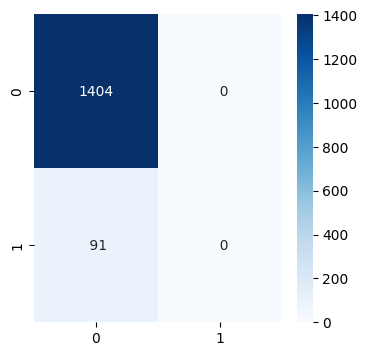

In [391]:
predictions = dt_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [392]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, dt_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, dt_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, dt_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, dt_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_tr.predict(td_test))))

train:
accuracy = 0.9549627079747561
precision = 0.0
recall = 0.0
f1 = 0.0
test:
accuracy = 0.9391304347826087
precision = 0.0
recall = 0.0
f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


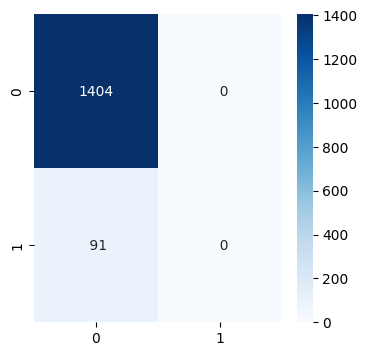

In [393]:
predictions = dt_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### случайный лес

In [394]:
rf_or = RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=8, min_samples_split=3, n_estimators=11)
rf_tr = RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=8, min_samples_split=3, n_estimators=11)

rf_or.fit(od_train, y_train)
rf_tr.fit(td_train, y_train)

RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=8,
                       min_samples_split=3, n_estimators=11)

In [395]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, rf_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, rf_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, rf_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, rf_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_or.predict(od_test))))

train:
accuracy = 0.9549627079747561
precision = 0.0
recall = 0.0
f1 = 0.0
test:
accuracy = 0.9391304347826087
precision = 0.0
recall = 0.0
f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


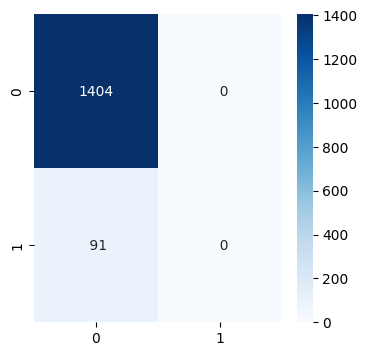

In [396]:
predictions = rf_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [397]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, rf_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, rf_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, rf_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, rf_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_tr.predict(td_test))))

train:
accuracy = 0.9549627079747561
precision = 0.0
recall = 0.0
f1 = 0.0
test:
accuracy = 0.9391304347826087
precision = 0.0
recall = 0.0
f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


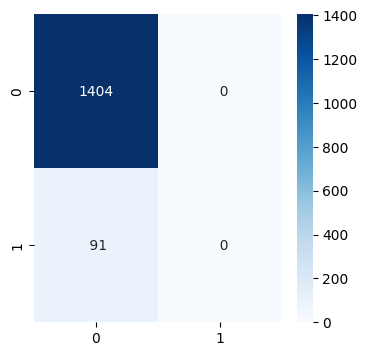

In [398]:
predictions = rf_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### градиентный бустинг

In [399]:
xgb_or = xgb.XGBClassifier(max_depth=3, n_estimators=1, eta=0.1)
xgb_tr = xgb.XGBClassifier(max_depth=3, n_estimators=1, eta=0.1)

xgb_or.fit(od_train, y_train)
xgb_tr.fit(td_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1,
              n_jobs=None, num_parallel_tree=None, ...)

In [400]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, xgb_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, xgb_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, xgb_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, xgb_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_or.predict(od_test))))

train:
accuracy = 0.9549627079747561
precision = 0.0
recall = 0.0
f1 = 0.0
test:
accuracy = 0.9391304347826087
precision = 0.0
recall = 0.0
f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


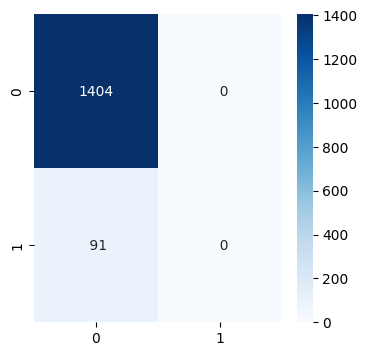

In [401]:
predictions = xgb_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [402]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, xgb_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, xgb_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, xgb_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, xgb_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_tr.predict(td_test))))

train:
accuracy = 0.9549627079747561
precision = 0.0
recall = 0.0
f1 = 0.0
test:
accuracy = 0.9391304347826087
precision = 0.0
recall = 0.0
f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


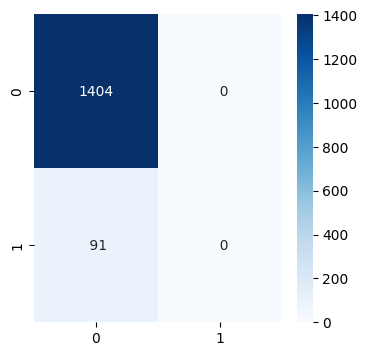

In [403]:
predictions = xgb_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

# Балансирование данных путём изменения весов классов

разбиваем выборку

In [404]:
od_train, od_test, y_od_train, y_test = train_test_split(origin_data, y, test_size=0.3, random_state=52)
td_train, td_test, y_td_train, y_test = train_test_split(transform_data, y, test_size=0.3, random_state=52)

балансируем данные

In [405]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_od = compute_class_weight('balanced', classes=np.unique(y_od_train), y=y_od_train)
class_weights_td = compute_class_weight('balanced', classes=np.unique(y_td_train), y=y_td_train)

## Выбираем лучшие параметры для моделей

дерево решений

In [406]:
GDCV = GridSearchCV( DecisionTreeClassifier(class_weight=dict(enumerate(class_weights))),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3}

случайный лес

In [407]:
GDCV = GridSearchCV( RandomForestClassifier(class_weight=dict(enumerate(class_weights))),
                     param_grid=[ { 'max_depth': [10],
                                    'min_samples_split': [5],
                                    'min_samples_leaf': [3],
                                    'max_features': [40, 60, 70, 80, 100],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'max_depth': 10,
 'max_features': 60,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 41}

## Обучение моделей с вычисленными параметрами

### дерево решений

In [408]:
dt_or = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights_od)), max_depth=10, min_samples_leaf=3, min_samples_split=5)
dt_tr = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights_td)), max_depth=10, min_samples_leaf=3, min_samples_split=5)

dt_or.fit(od_train, y_od_train)
dt_tr.fit(td_train, y_td_train)

DecisionTreeClassifier(class_weight={0: 0.5235806548513067,
                                     1: 11.101910828025478},
                       max_depth=10, min_samples_leaf=3, min_samples_split=5)

In [409]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_train, dt_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_od_train, dt_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_od_train, dt_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_od_train, dt_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_or.predict(od_test))))

train:
accuracy = 0.857429718875502
precision = 0.2400611620795107
recall = 1.0
f1 = 0.3871763255240444
test:
accuracy = 0.7966555183946489
precision = 0.11827956989247312
recall = 0.3626373626373626
f1 = 0.1783783783783784


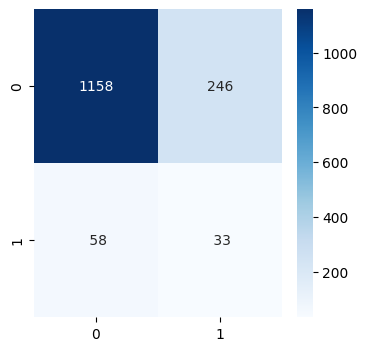

In [410]:
predictions = dt_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [411]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_train, dt_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_td_train, dt_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_td_train, dt_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_td_train, dt_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_tr.predict(td_test))))

train:
accuracy = 0.7733792312105565
precision = 0.1540983606557377
recall = 0.8980891719745223
f1 = 0.2630597014925373
test:
accuracy = 0.7418060200668897
precision = 0.1375921375921376
recall = 0.6153846153846154
f1 = 0.2248995983935743


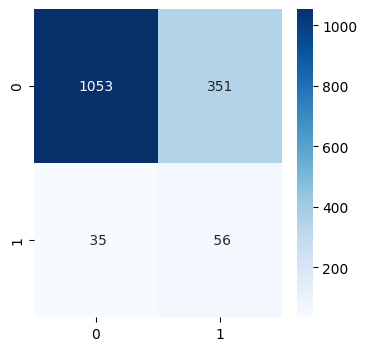

In [412]:
predictions = dt_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### случайный лес

In [413]:
rf_or = RandomForestClassifier(class_weight=dict(enumerate(class_weights_od)), max_depth=10, max_features=80, min_samples_leaf=3, min_samples_split=5, n_estimators=81)
rf_tr = RandomForestClassifier(class_weight=dict(enumerate(class_weights_td)), max_depth=10, max_features=80, min_samples_leaf=3, min_samples_split=5, n_estimators=81)

rf_or.fit(od_train, y_od_train)
rf_tr.fit(td_train, y_td_train)

RandomForestClassifier(class_weight={0: 0.5235806548513067,
                                     1: 11.101910828025478},
                       max_depth=10, max_features=80, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=81)

In [414]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_train, rf_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_od_train, rf_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_od_train, rf_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_od_train, rf_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_or.predict(od_test))))

train:
accuracy = 0.9400458978772231
precision = 0.4239766081871345
recall = 0.9235668789808917
f1 = 0.5811623246492986
test:
accuracy = 0.8889632107023412
precision = 0.12871287128712872
recall = 0.14285714285714285
f1 = 0.13541666666666666


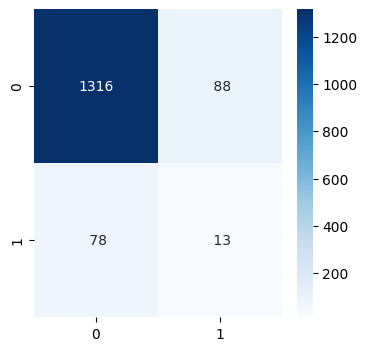

In [415]:
predictions = rf_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [416]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_train, rf_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_td_train, rf_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_td_train, rf_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_td_train, rf_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_tr.predict(td_test))))

train:
accuracy = 0.8215720022948939
precision = 0.17573221757322174
recall = 0.802547770700637
f1 = 0.28832951945080093
test:
accuracy = 0.7852842809364549
precision = 0.147239263803681
recall = 0.5274725274725275
f1 = 0.2302158273381295


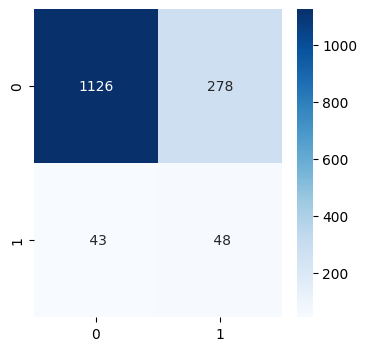

In [417]:
predictions = rf_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

# Балансирование данных путём оверсемплинга

разбиваем выборку

In [418]:
od_train, od_test, y_od_train, y_test = train_test_split(origin_data, y, test_size=0.3, random_state=52)
td_train, td_test, y_td_train, y_test = train_test_split(transform_data, y, test_size=0.3, random_state=52)

балансируем данные

In [419]:
ros = RandomOverSampler()
od_resampled, y_od_resampled = ros.fit_resample(od_train, y_od_train)
td_resampled, y_td_resampled = ros.fit_resample(td_train, y_td_train)

## Выбираем лучшие параметры для моделей

дерево решений

In [420]:
GDCV = GridSearchCV( DecisionTreeClassifier(),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(td_resampled, y_td_resampled)
GDCV.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3}

случайный лес

In [421]:
GDCV = GridSearchCV( RandomForestClassifier(),
                     param_grid=[ { 'max_depth': [3],
                                    'min_samples_split': [3],
                                    'min_samples_leaf': [8],
                                    'max_features': [40, 60, 70, 80, 100],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(td_resampled, y_td_resampled)
GDCV.best_params_

{'max_depth': 3,
 'max_features': 100,
 'min_samples_leaf': 8,
 'min_samples_split': 3,
 'n_estimators': 11}

градиентный бустинг

In [422]:
GDCV = GridSearchCV( xgb.XGBClassifier(),
                     param_grid=[ { 'max_depth': [3],
                                    'eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ], cv=5, scoring='accuracy' )
GDCV.fit(td_resampled, y_td_resampled)
GDCV.best_params_

{'eta': 1.0, 'max_depth': 3, 'n_estimators': 91}

## Обучение моделей с вычисленными параметрами

### дерево решений

In [423]:
dt_or = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=5)
dt_tr = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=5)

dt_or.fit(od_resampled, y_od_resampled)
dt_tr.fit(td_resampled, y_td_resampled)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=5)

In [424]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_resampled, dt_or.predict(od_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_od_resampled, dt_or.predict(od_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_od_resampled, dt_or.predict(od_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_od_resampled, dt_or.predict(od_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_or.predict(od_test))))

train:
accuracy = 0.7580354460799039
precision = 0.7816393442622951
recall = 0.7161309702613398
f1 = 0.7474525787741025
test:
accuracy = 0.8073578595317725
precision = 0.20241691842900303
recall = 0.7362637362637363
f1 = 0.3175355450236967


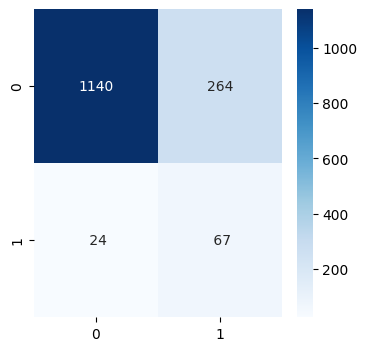

In [425]:
predictions = dt_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [426]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_tr.predict(td_test))))

train:
accuracy = 0.7726043857014119
precision = 0.7424525781458723
recall = 0.8347852207870231
f1 = 0.7859162895927602
test:
accuracy = 0.7204013377926421
precision = 0.1543340380549683
recall = 0.8021978021978022
f1 = 0.25886524822695034


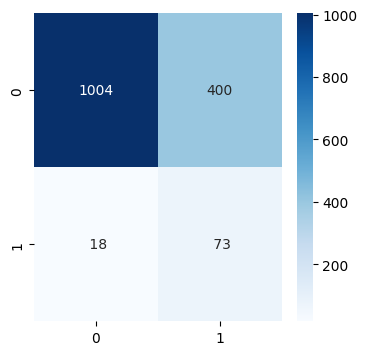

In [427]:
predictions = dt_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### случайный лес

In [428]:
rf_or = RandomForestClassifier(max_depth=3, max_features=100, min_samples_leaf=8, min_samples_split=3, n_estimators=51)
rf_tr = RandomForestClassifier(max_depth=3, max_features=100, min_samples_leaf=8, min_samples_split=3, n_estimators=51)

rf_or.fit(od_resampled, y_od_resampled)
rf_tr.fit(td_resampled, y_td_resampled)

RandomForestClassifier(max_depth=3, max_features=100, min_samples_leaf=8,
                       min_samples_split=3, n_estimators=51)

In [429]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_resampled, rf_or.predict(od_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_od_resampled, rf_or.predict(od_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_od_resampled, rf_or.predict(od_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_od_resampled, rf_or.predict(od_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_or.predict(od_test))))

train:
accuracy = 0.778311805346951
precision = 0.7392202427059127
recall = 0.8600180234304596
f1 = 0.7950569286309358
test:
accuracy = 0.7110367892976589
precision = 0.15415821501014199
recall = 0.8351648351648352
f1 = 0.2602739726027397


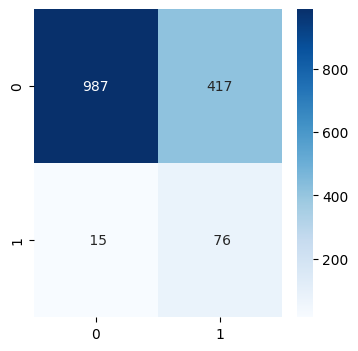

In [430]:
predictions = rf_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [431]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_tr.predict(td_test))))

train:
accuracy = 0.7726043857014119
precision = 0.7424525781458723
recall = 0.8347852207870231
f1 = 0.7859162895927602
test:
accuracy = 0.7204013377926421
precision = 0.1543340380549683
recall = 0.8021978021978022
f1 = 0.25886524822695034


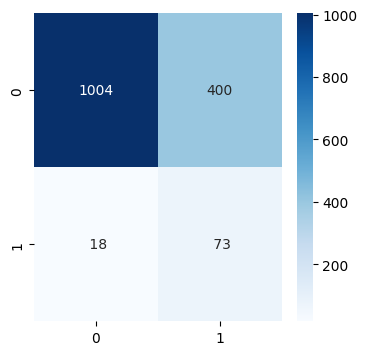

In [432]:
predictions = rf_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### градиентный бустинг

In [433]:
xgb_or = xgb.XGBClassifier(max_depth=3, n_estimators=91, eta=0.9)
xgb_tr = xgb.XGBClassifier(max_depth=3, n_estimators=91, eta=0.9)

xgb_or.fit(od_resampled, y_od_resampled)
xgb_tr.fit(td_resampled, y_td_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.9, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=91,
              n_jobs=None, num_parallel_tree=None, ...)

In [434]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_or.predict(od_test))))

train:
accuracy = 0.9403724842294984
precision = 0.9040793825799338
recall = 0.9852808651246621
f1 = 0.9429351732068421
test:
accuracy = 0.8294314381270903
precision = 0.12037037037037036
recall = 0.2857142857142857
f1 = 0.16938110749185667


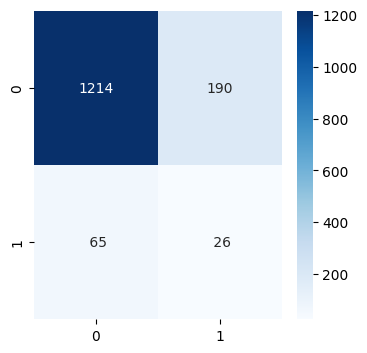

In [435]:
predictions = xgb_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [436]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_tr.predict(td_test))))

train:
accuracy = 0.8400420546710724
precision = 0.8054506206152185
recall = 0.8966656653649745
f1 = 0.8486140724946695
test:
accuracy = 0.7591973244147158
precision = 0.14323607427055704
recall = 0.5934065934065934
f1 = 0.23076923076923078


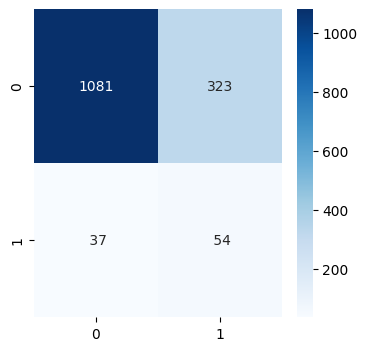

In [437]:
predictions = xgb_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

# Балансирование данных путём андерсемплинга

разбиваем выборку

In [438]:
od_train, od_test, y_od_train, y_test = train_test_split(origin_data, y, test_size=0.3, random_state=52)
td_train, td_test, y_td_train, y_test = train_test_split(transform_data, y, test_size=0.3, random_state=52)

балансируем данные

In [439]:
ros = RandomUnderSampler()
od_resampled, y_od_resampled = ros.fit_resample(od_train, y_od_train)
td_resampled, y_td_resampled = ros.fit_resample(td_train, y_td_train)

## Выбираем лучшие параметры для моделей

дерево решений

In [440]:
GDCV = GridSearchCV( DecisionTreeClassifier(),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(td_resampled, y_td_resampled)
GDCV.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 3, 'min_samples_leaf': 13, 'min_samples_split': 3}

случайный лес

In [441]:
GDCV = GridSearchCV( RandomForestClassifier(),
                     param_grid=[ { 'max_depth': [10],
                                    'min_samples_split': [5],
                                    'min_samples_leaf': [3],
                                    'max_features': [40, 60, 70, 80, 100],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(td_resampled, y_td_resampled)
GDCV.best_params_

{'max_depth': 10,
 'max_features': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 31}

градиентный бустинг

In [442]:
GDCV = GridSearchCV( xgb.XGBClassifier(),
                     param_grid=[ { 'max_depth': [10],
                                    'eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ], cv=5, scoring='accuracy' )
GDCV.fit(td_resampled, y_td_resampled)
GDCV.best_params_

{'eta': 0.1, 'max_depth': 10, 'n_estimators': 11}

## Обучение моделей с вычисленными параметрами

### дерево решений

In [443]:
dt_or = DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, min_samples_split=3)
dt_tr = DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, min_samples_split=3)

dt_or.fit(od_resampled, y_od_resampled)
dt_tr.fit(td_resampled, y_td_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, min_samples_split=3)

In [444]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_resampled, dt_or.predict(od_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_od_resampled, dt_or.predict(od_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_od_resampled, dt_or.predict(od_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_od_resampled, dt_or.predict(od_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_or.predict(od_test))))

train:
accuracy = 0.8057324840764332
precision = 0.7891566265060241
recall = 0.8343949044585988
f1 = 0.8111455108359134
test:
accuracy = 0.6882943143812709
precision = 0.13592233009708737
recall = 0.7692307692307693
f1 = 0.23102310231023102


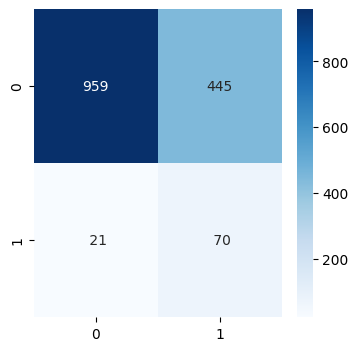

In [445]:
predictions = dt_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [446]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_tr.predict(td_test))))

train:
accuracy = 0.8152866242038217
precision = 0.7828571428571428
recall = 0.8726114649681529
f1 = 0.8253012048192772
test:
accuracy = 0.6575250836120401
precision = 0.13893653516295026
recall = 0.8901098901098901
f1 = 0.2403560830860534


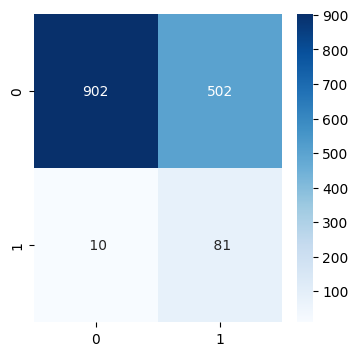

In [447]:
predictions = dt_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### случайный лес

In [448]:
rf_or = RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=3, min_samples_split=5, n_estimators=61)
rf_tr = RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=3, min_samples_split=5, n_estimators=61)

rf_or.fit(od_resampled, y_od_resampled)
rf_tr.fit(td_resampled, y_td_resampled)

RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=61)

In [449]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_resampled, rf_or.predict(od_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_od_resampled, rf_or.predict(od_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_od_resampled, rf_or.predict(od_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_od_resampled, rf_or.predict(od_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_or.predict(od_test))))

train:
accuracy = 0.7898089171974523
precision = 0.7333333333333333
recall = 0.910828025477707
f1 = 0.8125
test:
accuracy = 0.6287625418060201
precision = 0.1305732484076433
recall = 0.9010989010989011
f1 = 0.22809457579972184


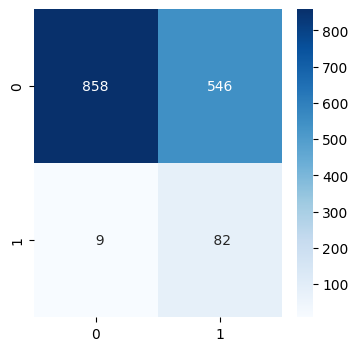

In [450]:
predictions = rf_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [451]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_tr.predict(td_test))))

train:
accuracy = 0.8152866242038217
precision = 0.7591623036649214
recall = 0.9235668789808917
f1 = 0.8333333333333334
test:
accuracy = 0.6147157190635452
precision = 0.12863705972434916
recall = 0.9230769230769231
f1 = 0.22580645161290322


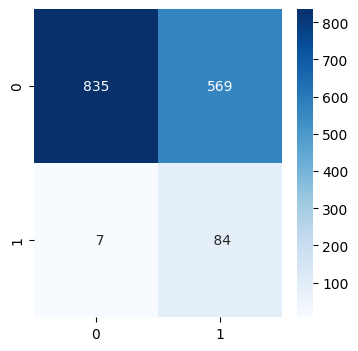

In [452]:
predictions = rf_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### градиентный бустинг

In [453]:
xgb_or = xgb.XGBClassifier(max_depth=3, n_estimators=1, eta=0.1)
xgb_tr = xgb.XGBClassifier(max_depth=3, n_estimators=1, eta=0.1)

xgb_or.fit(od_resampled, y_od_resampled)
xgb_tr.fit(td_resampled, y_td_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1,
              n_jobs=None, num_parallel_tree=None, ...)

In [454]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_or.predict(od_test))))

train:
accuracy = 0.767515923566879
precision = 0.7038834951456311
recall = 0.9235668789808917
f1 = 0.7988980716253443
test:
accuracy = 0.6147157190635452
precision = 0.12863705972434916
recall = 0.9230769230769231
f1 = 0.22580645161290322


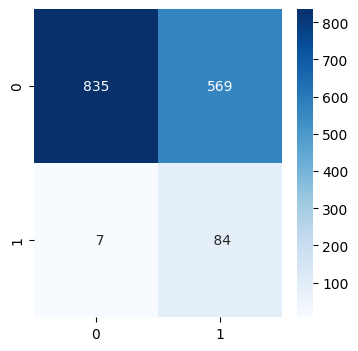

In [455]:
predictions = xgb_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [456]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_tr.predict(td_test))))

train:
accuracy = 0.8152866242038217
precision = 0.7591623036649214
recall = 0.9235668789808917
f1 = 0.8333333333333334
test:
accuracy = 0.6147157190635452
precision = 0.12863705972434916
recall = 0.9230769230769231
f1 = 0.22580645161290322


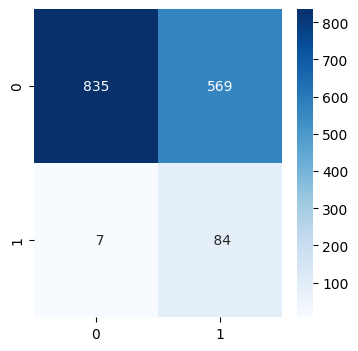

In [457]:
predictions = xgb_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

# Балансирование данных путём генерации синтетических данных с помощью smote

разбиваем выборку

In [458]:
od_train, od_test, y_od_train, y_test = train_test_split(origin_data, y, test_size=0.3, random_state=52)
td_train, td_test, y_td_train, y_test = train_test_split(transform_data, y, test_size=0.3, random_state=52)

балансируем данные

In [459]:
smote = SMOTE()
od_resampled, y_od_resampled = smote.fit_resample(od_train, y_od_train)
td_resampled, y_td_resampled = smote.fit_resample(td_train, y_td_train)

## Выбираем лучшие параметры для моделей

дерево решений

In [460]:
GDCV = GridSearchCV( DecisionTreeClassifier(),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(od_resampled, y_od_resampled)
GDCV.best_params_

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}

случайный лес

In [461]:
GDCV = GridSearchCV( RandomForestClassifier(),
                     param_grid=[ { 'max_depth': [10],
                                    'min_samples_split': [5],
                                    'min_samples_leaf': [3],
                                    'max_features': [40, 60, 70, 80, 100],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(od_resampled, y_od_resampled)
GDCV.best_params_

{'max_depth': 10,
 'max_features': 40,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 71}

градиентный бустинг

In [462]:
GDCV = GridSearchCV( xgb.XGBClassifier(),
                     param_grid=[ { 'max_depth': [10],
                                    'eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ], cv=5, scoring='accuracy' )
GDCV.fit(od_resampled, y_od_resampled)
GDCV.best_params_

{'eta': 0.1, 'max_depth': 10, 'n_estimators': 71}

## Обучение моделей с вычисленными параметрами

### дерево решений

In [463]:
dt_or = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)
dt_tr = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)

dt_or.fit(od_resampled, y_od_resampled)
dt_tr.fit(td_resampled, y_td_resampled)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)

In [464]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_resampled, dt_or.predict(od_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_od_resampled, dt_or.predict(od_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_od_resampled, dt_or.predict(od_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_od_resampled, dt_or.predict(od_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_or.predict(od_test))))

train:
accuracy = 0.835235806548513
precision = 0.8910301331464611
recall = 0.763893060979273
f1 = 0.8225780365518357
test:
accuracy = 0.8642140468227425
precision = 0.13636363636363635
recall = 0.23076923076923078
f1 = 0.17142857142857143


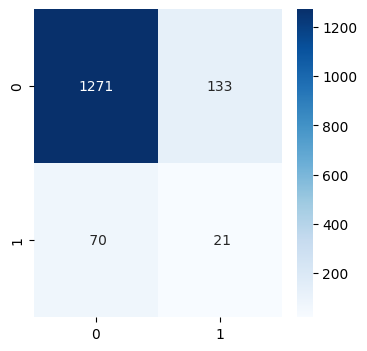

In [465]:
predictions = dt_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [466]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_tr.predict(td_test))))

train:
accuracy = 0.8017422649444278
precision = 0.7551435102870205
recall = 0.893060979273055
f1 = 0.8183319570602807
test:
accuracy = 0.7204013377926421
precision = 0.1543340380549683
recall = 0.8021978021978022
f1 = 0.25886524822695034


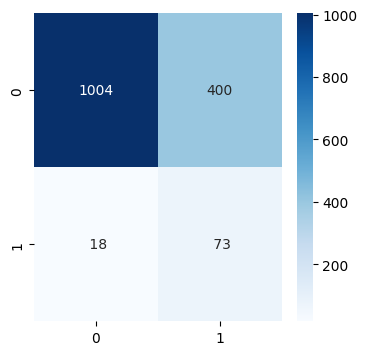

In [467]:
predictions = dt_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### случайный лес

In [468]:
rf_or = RandomForestClassifier(max_depth=3, max_features=100, min_samples_leaf=3, min_samples_split=5, n_estimators=81)
rf_tr = RandomForestClassifier(max_depth=3, max_features=100, min_samples_leaf=3, min_samples_split=5, n_estimators=81)

rf_or.fit(od_resampled, y_od_resampled)
rf_tr.fit(td_resampled, y_td_resampled)

RandomForestClassifier(max_depth=3, max_features=100, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=81)

In [469]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_resampled, rf_or.predict(od_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_od_resampled, rf_or.predict(od_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_od_resampled, rf_or.predict(od_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_od_resampled, rf_or.predict(od_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_or.predict(od_test))))

train:
accuracy = 0.8736857915289877
precision = 0.8514124293785311
recall = 0.9053769900871133
f1 = 0.8775658756733149
test:
accuracy = 0.8301003344481606
precision = 0.1828793774319066
recall = 0.5164835164835165
f1 = 0.27011494252873564


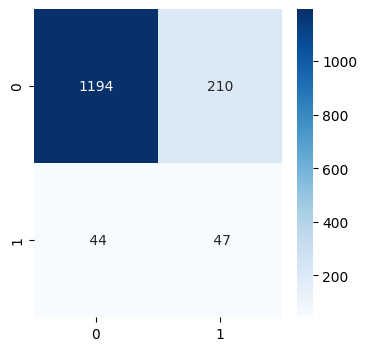

In [470]:
predictions = rf_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [471]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_tr.predict(td_test))))

train:
accuracy = 0.8015920696905978
precision = 0.7550813008130082
recall = 0.892760588765395
f1 = 0.8181693048864418
test:
accuracy = 0.7204013377926421
precision = 0.1543340380549683
recall = 0.8021978021978022
f1 = 0.25886524822695034


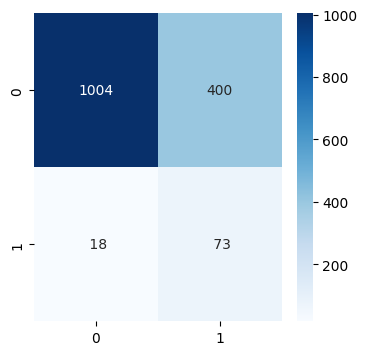

In [472]:
predictions = rf_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### градиентный бустинг

In [473]:
xgb_or = xgb.XGBClassifier(max_depth=3, n_estimators=81, eta=0.2)
xgb_tr = xgb.XGBClassifier(max_depth=3, n_estimators=81, eta=0.2)

xgb_or.fit(od_resampled, y_od_resampled)
xgb_tr.fit(td_resampled, y_td_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=81,
              n_jobs=None, num_parallel_tree=None, ...)

In [474]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_or.predict(od_test))))

train:
accuracy = 0.9723640732952838
precision = 0.9921752738654147
recall = 0.9522379092820666
f1 = 0.9717964438994482
test:
accuracy = 0.9337792642140468
precision = 0.16666666666666666
recall = 0.02197802197802198
f1 = 0.038834951456310676


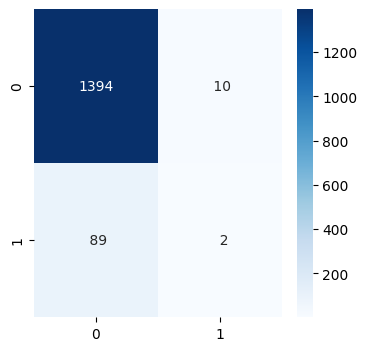

In [475]:
predictions = xgb_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [476]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_tr.predict(td_test))))

train:
accuracy = 0.8984680084109342
precision = 0.8907216494845361
recall = 0.9083808951637128
f1 = 0.8994646044021416
test:
accuracy = 0.8501672240802676
precision = 0.15544041450777202
recall = 0.32967032967032966
f1 = 0.2112676056338028


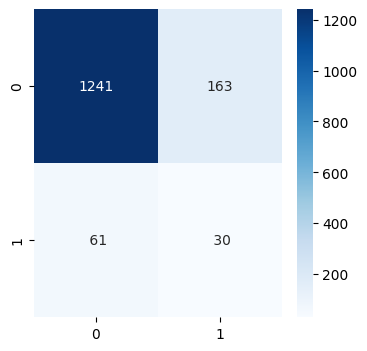

In [477]:
predictions = xgb_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

# Балансирование данных путём генерации синтетических данных с помощью ADASYN

разбиваем выборку

In [478]:
od_train, od_test, y_od_train, y_od_test = train_test_split(origin_data, y, test_size=0.3, random_state=52)
td_train, td_test, y_td_train, y_td_test = train_test_split(transform_data, y, test_size=0.3, random_state=52)

балансируем данные

In [479]:
adasyn = ADASYN()
od_resampled, y_od_resampled = adasyn.fit_resample(od_train, y_od_train)
td_resampled, y_td_resampled = adasyn.fit_resample(td_train, y_td_train)

## Выбираем лучшие параметры для моделей

дерево решений

In [480]:
GDCV = GridSearchCV( DecisionTreeClassifier(),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(td_resampled, y_td_resampled)
GDCV.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3}

случайный лес

In [481]:
GDCV = GridSearchCV( RandomForestClassifier(),
                     param_grid=[ { 'max_depth': [10],
                                    'min_samples_split': [5],
                                    'min_samples_leaf': [3],
                                    'max_features': [40, 60, 70, 80, 100],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(td_resampled, y_td_resampled)
GDCV.best_params_

{'max_depth': 10,
 'max_features': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 31}

градиентный бустинг

In [482]:
GDCV = GridSearchCV( xgb.XGBClassifier(),
                     param_grid=[ { 'max_depth': [10],
                                    'eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ], cv=5, scoring='accuracy' )
GDCV.fit(td_resampled, y_td_resampled)
GDCV.best_params_

{'eta': 0.4, 'max_depth': 10, 'n_estimators': 21}

## Обучение моделей с вычисленными параметрами

### дерево решений

In [483]:
dt_or = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=13)
dt_tr = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=13)

dt_or.fit(od_resampled, y_od_resampled)
dt_tr.fit(td_resampled, y_td_resampled)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=13)

In [484]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_resampled, dt_or.predict(od_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_od_resampled, dt_or.predict(od_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_od_resampled, dt_or.predict(od_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_od_resampled, dt_or.predict(od_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_test, dt_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_od_test, dt_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_od_test, dt_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_od_test, dt_or.predict(od_test))))

train:
accuracy = 0.8326830732292917
precision = 0.7644116245831348
recall = 0.9622188905547227
f1 = 0.8519846010885438
test:
accuracy = 0.7204013377926421
precision = 0.1358574610244989
recall = 0.6703296703296703
f1 = 0.22592592592592592


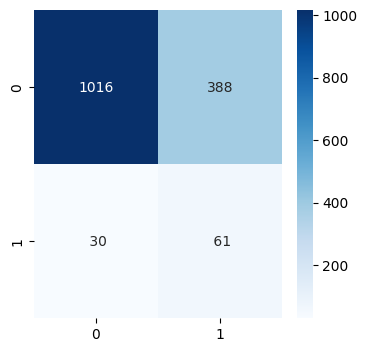

In [485]:
predictions = dt_or.predict(od_test)
cm = confusion_matrix(y_od_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [486]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_td_resampled, dt_tr.predict(td_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_test, dt_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_td_test, dt_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_td_test, dt_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_td_test, dt_tr.predict(td_test))))

train:
accuracy = 0.7917795844625113
precision = 0.7501296008294454
recall = 0.8735285239963779
f1 = 0.8071398689164692
test:
accuracy = 0.7204013377926421
precision = 0.1543340380549683
recall = 0.8021978021978022
f1 = 0.25886524822695034


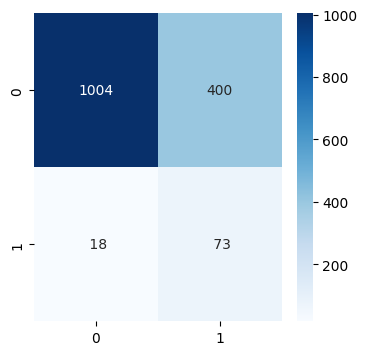

In [487]:
predictions = dt_tr.predict(td_test)
cm = confusion_matrix(y_td_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### случайный лес

In [488]:
rf_or = RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=3, min_samples_split=5, n_estimators=21)
rf_tr = RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=3, min_samples_split=5, n_estimators=21)

rf_or.fit(od_resampled, y_od_resampled)
rf_tr.fit(td_resampled, y_td_resampled)

RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=21)

In [489]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_resampled, rf_or.predict(od_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_od_resampled, rf_or.predict(od_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_od_resampled, rf_or.predict(od_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_od_resampled, rf_or.predict(od_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_test, rf_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_od_test, rf_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_od_test, rf_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_od_test, rf_or.predict(od_test))))

train:
accuracy = 0.8326830732292917
precision = 0.7644116245831348
recall = 0.9622188905547227
f1 = 0.8519846010885438
test:
accuracy = 0.7204013377926421
precision = 0.1358574610244989
recall = 0.6703296703296703
f1 = 0.22592592592592592


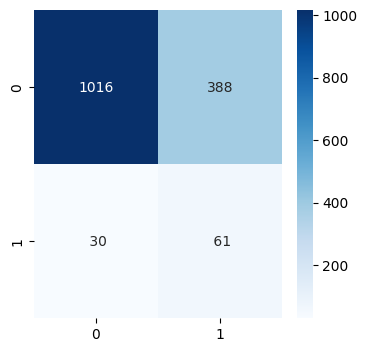

In [490]:
predictions = rf_or.predict(od_test)
cm = confusion_matrix(y_od_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [491]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_td_resampled, rf_tr.predict(td_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_test, rf_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_td_test, rf_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_td_test, rf_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_td_test, rf_tr.predict(td_test))))

train:
accuracy = 0.8006624510689552
precision = 0.7538932856778147
recall = 0.8913371566555992
f1 = 0.8168741355463347
test:
accuracy = 0.7204013377926421
precision = 0.1543340380549683
recall = 0.8021978021978022
f1 = 0.25886524822695034


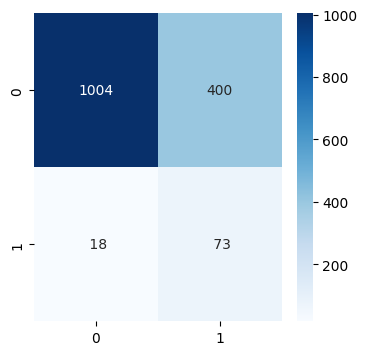

In [492]:
predictions = rf_tr.predict(td_test)
cm = confusion_matrix(y_td_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### градиентный бустинг

In [493]:
xgb_or = xgb.XGBClassifier(max_depth=3, n_estimators=61, eta=0.8)
xgb_tr = xgb.XGBClassifier(max_depth=3, n_estimators=61, eta=0.8)

xgb_or.fit(od_resampled, y_od_resampled)
xgb_tr.fit(td_resampled, y_td_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.8, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=61,
              n_jobs=None, num_parallel_tree=None, ...)

In [494]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_od_resampled, xgb_or.predict(od_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_test, xgb_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_od_test, xgb_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_od_test, xgb_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_od_test, xgb_or.predict(od_test))))

train:
accuracy = 0.976890756302521
precision = 0.9950202303143479
recall = 0.9586206896551724
f1 = 0.9764813683567501
test:
accuracy = 0.9304347826086956
precision = 0.06666666666666667
recall = 0.01098901098901099
f1 = 0.018867924528301886


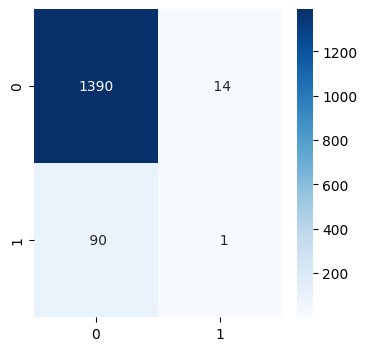

In [495]:
predictions = xgb_or.predict(od_test)
cm = confusion_matrix(y_od_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [496]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('precision = {0}'.format(metrics.precision_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('recall = {0}'.format(metrics.recall_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('f1 = {0}'.format(metrics.f1_score(y_td_resampled, xgb_tr.predict(td_resampled))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_test, xgb_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_td_test, xgb_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_td_test, xgb_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_td_test, xgb_tr.predict(td_test))))

train:
accuracy = 0.8961156278229448
precision = 0.8881325836046168
recall = 0.9058255357681859
f1 = 0.8968918111177525
test:
accuracy = 0.8434782608695652
precision = 0.12169312169312169
recall = 0.25274725274725274
f1 = 0.16428571428571428


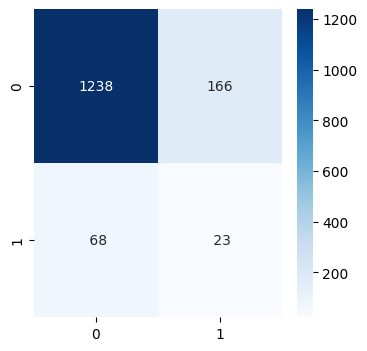

In [497]:
predictions = xgb_tr.predict(td_test)
cm = confusion_matrix(y_td_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()